In [1]:
library(data.table)
library(ggplot2)
library(cowplot)
library(plyr)
library(dplyr)
library(wesanderson)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [64]:
df1_11 = readRDS("../data/Picarro_data/short.data.1-11.rds")
df12_28 = readRDS("../data/Picarro_data/short.data.12-28.rds")
df = rbind(df1_11,df12_28)
short.data = df

In [65]:
# Re-run cumulative additions

short.data[, Soil.CO2.mean.mg.per.gram.soil.cum := as.numeric(NA)]
short.data[!is.na(Soil.CO2.mean.mg.per.gram.soil), Soil.CO2.mean.mg.per.gram.soil.cum := cumsum(Soil.CO2.mean.mg.per.gram.soil), by=(sample.test)]
short.data[, Amdmt.CO2.mean.mg.per.mg.amdmt.cum := as.numeric(NA)]
short.data[!is.na(Amdmt.CO2.mean.mg.per.mg.amdmt), Amdmt.CO2.mean.mg.per.mg.amdmt.cum := cumsum(Amdmt.CO2.mean.mg.per.mg.amdmt), by=(sample.test)]

short.data[, Soil.CO2.paired.mean.mg.per.gram.soil.cum := as.numeric(NA)]
short.data[!is.na(Soil.CO2.paired.mean.mg.per.gram.soil), Soil.CO2.paired.mean.mg.per.gram.soil.cum := cumsum(Soil.CO2.paired.mean.mg.per.gram.soil), by=(sample.test)]
short.data[, Amdmt.CO2.paired.mean.mg.per.mg.amdmt.cum := as.numeric(NA)]
short.data[!is.na(Amdmt.CO2.paired.mean.mg.per.mg.amdmt), Amdmt.CO2.paired.mean.mg.per.mg.amdmt.cum := cumsum(Amdmt.CO2.paired.mean.mg.per.mg.amdmt), by=(sample.test)]

short.data[, Soil.CO2.mg.per.gram.soil.cum := as.numeric(NA)]
short.data[!is.na(Soil.CO2.mg.per.gram.soil), Soil.CO2.mg.per.gram.soil.cum := cumsum(Soil.CO2.mg.per.gram.soil), by=(sample.test)]
short.data[, Amdmt.CO2.mg.per.mg.amdmt.cum := as.numeric(NA)]
short.data[!is.na(Amdmt.CO2.mg.per.mg.amdmt), Amdmt.CO2.mg.per.mg.amdmt.cum := cumsum(Amdmt.CO2.mg.per.mg.amdmt), by=(sample.test)]

In [66]:
D = dim(short.data)[2]
#short.data[short.data$sample.rep == 11 & short.data$sample.test == 61,c(D-44,D-42,D-40,D-38,D-36,D-34)]
    # The dataset we want to change
    # Along with the data we'll use to replace it
#short.data[short.data$sample.rep == 11 & short.data$Soil_Trtmt == "AK" & short.data$Amdmt == "OM" & sample.test != 61,c(D-44,D-42,D-40,D-38,D-36,D-34)]
Means = colMeans(short.data[short.data$sample.rep == 11 & short.data$Soil_Trtmt == "AK" & short.data$Amdmt == "OM" & sample.test != 61,][,(D-5):D])

short.data[short.data$sample.rep == 11 & short.data$sample.test == 61,][,c('Soil.CO2.mean.mg.per.gram.soil',
    'Amdmt.CO2.mean.mg.per.mg.amdmt', 'Soil.CO2.paired.mean.mg.per.gram.soil','Amdmt.CO2.paired.mean.mg.per.mg.amdmt',
    'Soil.CO2.mg.per.gram.soil','Amdmt.CO2.mg.per.mg.amdmt')] = data.frame(t(Means))
short.data[short.data$sample.rep < 11 & short.data$sample.test == 61,][,c('Soil.CO2.mean.mg.per.gram.soil',
    'Amdmt.CO2.mean.mg.per.mg.amdmt', 'Soil.CO2.paired.mean.mg.per.gram.soil','Amdmt.CO2.paired.mean.mg.per.mg.amdmt',
    'Soil.CO2.mg.per.gram.soil','Amdmt.CO2.mg.per.mg.amdmt')]= NA
## Rerunning the cells above

short.data[, Soil.CO2.mean.mg.per.gram.soil.cum := as.numeric(NA)]
short.data[!is.na(Soil.CO2.mean.mg.per.gram.soil), Soil.CO2.mean.mg.per.gram.soil.cum := cumsum(Soil.CO2.mean.mg.per.gram.soil), by=(sample.test)]
short.data[, Amdmt.CO2.mean.mg.per.mg.amdmt.cum := as.numeric(NA)]
short.data[!is.na(Amdmt.CO2.mean.mg.per.mg.amdmt), Amdmt.CO2.mean.mg.per.mg.amdmt.cum := cumsum(Amdmt.CO2.mean.mg.per.mg.amdmt), by=(sample.test)]

short.data[, Soil.CO2.paired.mean.mg.per.gram.soil.cum := as.numeric(NA)]
short.data[!is.na(Soil.CO2.paired.mean.mg.per.gram.soil), Soil.CO2.paired.mean.mg.per.gram.soil.cum := cumsum(Soil.CO2.paired.mean.mg.per.gram.soil), by=(sample.test)]
short.data[, Amdmt.CO2.paired.mean.mg.per.mg.amdmt.cum := as.numeric(NA)]
short.data[!is.na(Amdmt.CO2.paired.mean.mg.per.mg.amdmt), Amdmt.CO2.paired.mean.mg.per.mg.amdmt.cum := cumsum(Amdmt.CO2.paired.mean.mg.per.mg.amdmt), by=(sample.test)]

short.data[, Soil.CO2.mg.per.gram.soil.cum := as.numeric(NA)]
short.data[!is.na(Soil.CO2.mg.per.gram.soil), Soil.CO2.mg.per.gram.soil.cum := cumsum(Soil.CO2.mg.per.gram.soil), by=(sample.test)]
short.data[, Amdmt.CO2.mg.per.mg.amdmt.cum := as.numeric(NA)]
short.data[!is.na(Amdmt.CO2.mg.per.mg.amdmt), Amdmt.CO2.mg.per.mg.amdmt.cum := cumsum(Amdmt.CO2.mg.per.mg.amdmt), by=(sample.test)]

### Putting in NAs

#short.data[short.data$sample.rep <= 11 & short.data$sample.test == 61,][,(D-45):D] = NA

In [67]:
options(repr.plot.width=9, repr.plot.height=4)
# Should be able to plot CO2 at each timestep

df = short.data%>%
    filter(Soil_Sample !="Blank")

p = ggplot(df,aes(x=sample.rep,y=Soil.CO2.mean.mg.per.gram.soil.cum, colour=Amdmt))
p = p + geom_point()
p = p + facet_grid(~Soil_Trtmt, scales="free_y")
p = p + geom_vline(xintercept=11.5, linetype="dashed")
#p = p + ylim(0,1000)
#p
options(repr.plot.width=9, repr.plot.height=12)
p = ggplot(df,aes(x=sample.rep,y=Amdmt.CO2.mean.mg.per.mg.amdmt.cum, colour=Amdmt))
p = p + geom_point()
p = p + facet_wrap(~Soil_Sample, scales="free_y", ncol=4)
p = p + geom_vline(xintercept=11.5, linetype="dashed")
#p = p + ylim(0,1000)
#p

## Something was definitely wrong with Jar 61 for the first dataset - weird peaks, no emissions
## Later dataset for 61 ok, so just added second timepoint to average value from other samples

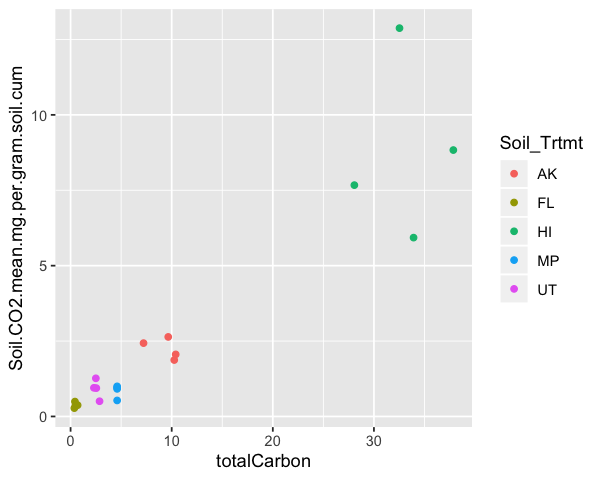

In [68]:
options(repr.plot.width=5, repr.plot.height=4)
df = short.data %>%
    filter(Amdmt != "Blank")

p = ggplot(df[df$sample.rep==24 & df$Amdmt=="Soil",],
           aes(x=totalCarbon,y=Soil.CO2.mean.mg.per.gram.soil.cum,colour=Soil_Trtmt))
p = p + geom_point()
#p = p + facet_wrap(~Soil_Trtmt,scales="free")
p

# No clear information is gained from including the exact C values from the soil samples
# e.g., high C samples weren't necessariyl responsible for greater C emissions.
# Thus, likely best to just take average (as we did with baseline Soil emissions)

In [69]:
# Summarizing means and errors

short.data$totalCarbon = as.numeric(paste(short.data$totalCarbon))
# Making sure it's numeric
short.data$totalCarbon = short.data$totalCarbon/100
# Turning it into a fraction
short.data$Amdmt_C_frac = as.numeric(paste(short.data$Amdmt_C_frac))
short.data$Amdmt_mg = as.numeric(paste(short.data$Amdmt_mg))

# Getting the mean C value for each soil type
df.meanC = short.data%>%
    dplyr::filter(Soil_Sample !="Blank") %>%
    dplyr::group_by(Soil_Trtmt, totalCarbon)%>%
    dplyr::summarize()%>%
    dplyr::group_by(Soil_Trtmt)%>%
    dplyr::mutate(meanCarbon=mean(totalCarbon))%>%
    dplyr::group_by(Soil_Trtmt,meanCarbon)%>%
    dplyr::summarize()

short.data = merge(short.data,df.meanC,by="Soil_Trtmt",all.x=TRUE)

df.means = short.data%>%
    dplyr::filter(Soil_Sample !="Blank") %>%
    dplyr::mutate(Soil.CO2.mean.mg.per.gram.soil.C.cum = Soil.CO2.mean.mg.per.gram.soil.cum / meanCarbon)%>%
    dplyr::mutate(Amdmt.CO2.mean.mg.per.mg.amdmt.C.cum = Amdmt.CO2.mean.mg.per.mg.amdmt.cum / (Amdmt_C_frac))%>%
    dplyr::group_by(Soil_Trtmt,Amdmt,sample.rep)%>%
    dplyr::mutate(Amdmt_mg = mean(Amdmt_mg,na.rm=TRUE))%>%
    dplyr::group_by(Soil_Trtmt,Amdmt,sample.rep,Amdmt_mg)%>%
    dplyr::summarize(
             Amdmt_mean_cum_CO2_mg_mg_Amdmt = mean(Amdmt.CO2.mean.mg.per.mg.amdmt.cum, na.rm=TRUE),
             Amdmt_mean_cum_CO2_mg_mg_Amdmt_C = mean(Amdmt.CO2.mean.mg.per.mg.amdmt.C.cum, na.rm=TRUE),
             Soil_mean_cum_CO2_mg_g_Soil = mean(Soil.CO2.mean.mg.per.gram.soil.cum, na.rm=TRUE),
             Soil_mean_cum_CO2_mg_g_Soil_C = mean(Soil.CO2.mean.mg.per.gram.soil.C.cum, na.rm=TRUE),
             Amdmt_sd = sd(Amdmt.CO2.mean.mg.per.mg.amdmt.cum, na.rm=TRUE),
             Amdmt_sd.C = sd(Amdmt.CO2.mean.mg.per.mg.amdmt.C.cum, na.rm=TRUE),
             Soil_sd = sd(Soil.CO2.mean.mg.per.gram.soil.cum, na.rm=TRUE),
             Soil_sd.C = sd(Soil.CO2.mean.mg.per.gram.soil.C.cum, na.rm=TRUE),
             Count = n())%>%
    dplyr::mutate(Amdmt_se = (Amdmt_sd / (Count^0.5)),
                  Amdmt_se.C = (Amdmt_sd.C / (Count^0.5)),
                  Soil_se = (Soil_sd / (Count^0.5)),
                  Soil_se.C = (Soil_sd.C / (Count^0.5)))

# Renaming factors, etc.
df.means$Soil_Trtmt = droplevels(df.means$Soil_Trtmt)
df.means$Soil_Trtmt = revalue(df.means$Soil_Trtmt, c("AK"="Alaska","FL"="Florida","HI"="Hawaii","MP"="New York","UT"="Utah"))
df.means$Soil_Trtmt = factor(df.means$Soil_Trtmt, levels = c("Hawaii","Alaska","Utah","New York","Florida"))
timestep = 22.4/24
df.means$Day = df.means$sample.rep * timestep

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [70]:
head(df.means)

Soil_Trtmt,Amdmt,sample.rep,Amdmt_mg,Amdmt_mean_cum_CO2_mg_mg_Amdmt,Amdmt_mean_cum_CO2_mg_mg_Amdmt_C,Soil_mean_cum_CO2_mg_g_Soil,Soil_mean_cum_CO2_mg_g_Soil_C,Amdmt_sd,Amdmt_sd.C,Soil_sd,Soil_sd.C,Count,Amdmt_se,Amdmt_se.C,Soil_se,Soil_se.C,Day
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alaska,OM,1,29.9775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,0.9333333
Alaska,OM,2,29.9775,0.02092593,0.05069267,0.3846461,4.100814,0.003152349,0.007636505,0.06139616,0.6545607,4,0.001576175,0.003818252,0.03069808,0.3272803,1.8666667
Alaska,OM,3,29.9900,0.03540400,0.08576551,0.6702471,7.145682,0.002826453,0.006847028,0.11312961,1.2061048,3,0.001631853,0.003953133,0.06531541,0.6963449,2.8000000
Alaska,OM,4,29.9775,0.05118208,0.12398759,0.8830571,9.414505,0.005984980,0.014498498,0.17489827,1.8646368,4,0.002992490,0.007249249,0.08744913,0.9323184,3.7333333
Alaska,OM,5,29.9775,0.07338651,0.17777740,1.0304848,10.986272,0.017097678,0.041418794,0.26057857,2.7780972,4,0.008548839,0.020709397,0.13028929,1.3890486,4.6666667
Alaska,OM,6,29.9775,0.09462695,0.22923195,1.1702874,12.476744,0.028322771,0.068611364,0.34474920,3.6754626,4,0.014161385,0.034305682,0.17237460,1.8377313,5.6000000


In [71]:
df.means$Soil_Name = df.means$Soil_Trtmt
levels(df.means$Soil_Name)[levels(df.means$Soil_Name)=="Hawaii"] = "Hydrudand"
levels(df.means$Soil_Name)[levels(df.means$Soil_Name)=="New York"] = "Fragiudept"
levels(df.means$Soil_Name)[levels(df.means$Soil_Name)=="Alaska"] = "Cryaquept"
levels(df.means$Soil_Name)[levels(df.means$Soil_Name)=="Utah"] = "Haplocalcid"
levels(df.means$Soil_Name)[levels(df.means$Soil_Name)=="Florida"] = "Quartzipsamment"

In [72]:
df.export = short.data %>%
    mutate(Day = sample.rep * timestep)%>%
    filter(Soil_Sample != "Blank")%>%
    filter(!is.na(Soil_Trtmt))%>%
    filter((Day >1 & Day <2) | (Day >10 & Day <11) | Day > 26)%>%
    mutate(Soil.CO2.mean.mg.per.gram.soil.C.cum = Soil.CO2.mean.mg.per.gram.soil.cum / meanCarbon)%>%
    mutate(Amdmt.CO2.mean.mg.per.mg.amdmt.C.cum = Amdmt.CO2.mean.mg.per.mg.amdmt.cum / (Amdmt_C_frac))

df.export=df.export[,colnames(df.export)[c(1:4,17:32,117,118,124,125)]]

In [73]:
#write.csv(df.export, file = "../data/Sample_data/PicarroResults.csv",row.names=FALSE)

## Making figures

In [74]:
colnames(df.means)

[1] "Soil_Trtmt"                       "Amdmt"                           
 [3] "sample.rep"                       "Amdmt_mg"                        
 [5] "Amdmt_mean_cum_CO2_mg_mg_Amdmt"   "Amdmt_mean_cum_CO2_mg_mg_Amdmt_C"
 [7] "Soil_mean_cum_CO2_mg_g_Soil"      "Soil_mean_cum_CO2_mg_g_Soil_C"   
 [9] "Amdmt_sd"                         "Amdmt_sd.C"                      
[11] "Soil_sd"                          "Soil_sd.C"                       
[13] "Count"                            "Amdmt_se"                        
[15] "Amdmt_se.C"                       "Soil_se"                         
[17] "Soil_se.C"                        "Day"                             
[19] "Soil_Name"

In [75]:
df.means$CO2_tot_mean_cum_mg_g_Soil = df.means$Soil_mean_cum_CO2_mg_g_Soil+df.means$Amdmt_mean_cum_CO2_mg_mg_Amdmt*df.means$Amdmt_mg
df.means$CO2_tot_mean_cum_mg_g_Soil_sd = df.means$Soil_sd+df.means$Amdmt_sd*df.means$Amdmt_mg

Warning message:
“Removed 150 rows containing missing values (geom_point).”

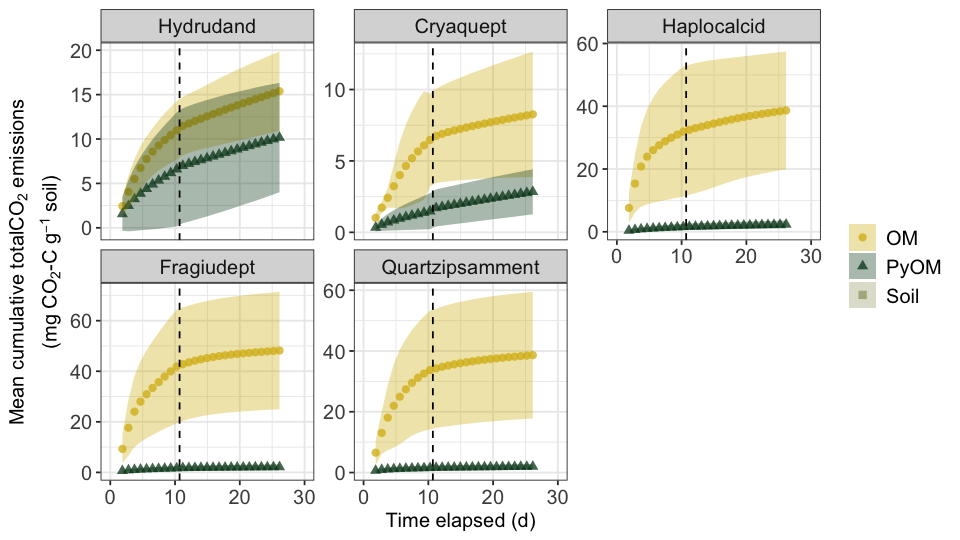

In [78]:
options(repr.plot.width=8, repr.plot.height=4.5)

p = ggplot(df.means,aes(x=Day, y=CO2_tot_mean_cum_mg_g_Soil, shape=Amdmt))
p = p + geom_point(size=2, alpha=0.75, aes(color = Amdmt))
p = p + theme_bw()
p = p + geom_ribbon(aes(fill=Amdmt, ymin = CO2_tot_mean_cum_mg_g_Soil - 1.96*CO2_tot_mean_cum_mg_g_Soil_sd, ymax = CO2_tot_mean_cum_mg_g_Soil + 1.96*CO2_tot_mean_cum_mg_g_Soil_sd),alpha=0.35)
p = p + geom_vline(xintercept=10.7, linetype="dashed")
p = p + facet_wrap(~Soil_Name, scales="free_y", ncol=3)
#p = p + expand_limits(y=0)
p = p + ylab(expression(atop(paste("Mean cumulative total", CO[2]," emissions",sep=""), paste("(mg ", CO[2], "-C ", g^-1," soil)", sep="")))) + xlab("Time elapsed (d)")
wespalette = c(wes_palette("Cavalcanti1"))
wespalette = wespalette[c(1,2,3)]
p = p + scale_colour_manual(values=wespalette)
p = p + scale_fill_manual(values=wespalette)
p = p + xlim(0,30)
p = p + theme(legend.title = element_blank())
p = p + theme(strip.text = element_text(size=12),axis.text = element_text(size=12))
p = p + theme(axis.title = element_text(size=12),legend.text=element_text(size=12))

p

Warning message:
“Removed 15 rows containing missing values (geom_point).”

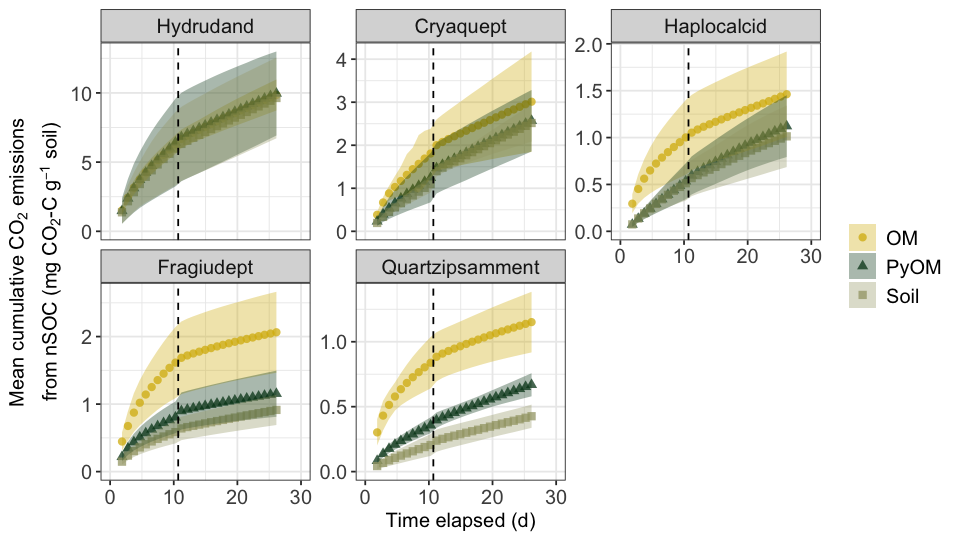

In [16]:
options(repr.plot.width=8, repr.plot.height=4.5)

p = ggplot(df.means,aes(x=Day, y=Soil_mean_cum_CO2_mg_g_Soil, shape=Amdmt))
p = p + geom_point(size=2, alpha=0.75, aes(color = Amdmt))
p = p + theme_bw()
p = p + geom_ribbon(aes(fill=Amdmt, ymin = Soil_mean_cum_CO2_mg_g_Soil - 1.96*Soil_se, ymax = Soil_mean_cum_CO2_mg_g_Soil + 1.96*Soil_se),alpha=0.35)
p = p + geom_vline(xintercept=10.7, linetype="dashed")
p = p + facet_wrap(~Soil_Name, scales="free_y", ncol=3)
p = p + expand_limits(y=0)
p = p + ylab(expression(atop(paste("Mean cumulative ", CO[2]," emissions",sep=""), paste("from nSOC (mg ", CO[2], "-C ", g^-1," soil)", sep="")))) + xlab("Time elapsed (d)")
wespalette = c(wes_palette("Cavalcanti1"))
wespalette = wespalette[c(1,2,3)]
p = p + scale_colour_manual(values=wespalette)
p = p + scale_fill_manual(values=wespalette)
p = p + xlim(0,30)
p = p + theme(legend.title = element_blank())
p = p + theme(strip.text = element_text(size=12),axis.text = element_text(size=12))
p = p + theme(axis.title = element_text(size=12),legend.text=element_text(size=12))

p

Warning message:
“Removed 15 rows containing missing values (geom_point).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

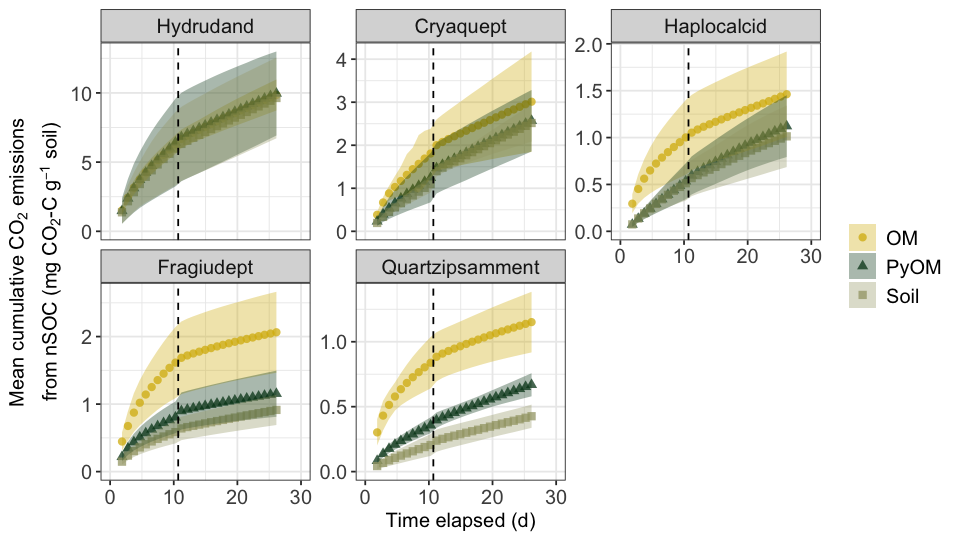

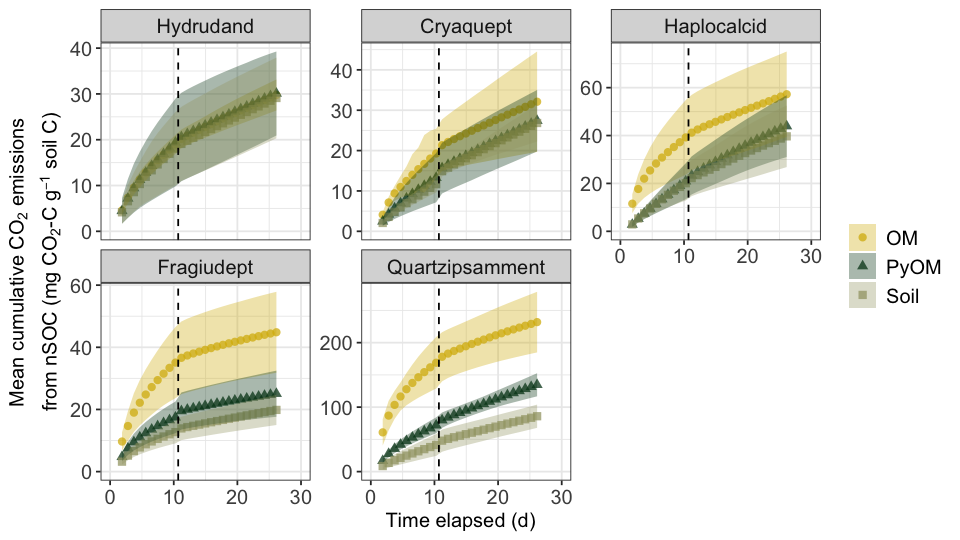

In [21]:
options(repr.plot.width=8, repr.plot.height=4.5)

p = ggplot(df.means,aes(x=Day, y=Soil_mean_cum_CO2_mg_g_Soil, shape=Amdmt))
p = p + geom_point(size=2, alpha=0.75,aes(color = Amdmt))
p = p + theme_bw()
p = p + geom_ribbon(aes(fill=Amdmt,ymin = Soil_mean_cum_CO2_mg_g_Soil - 1.96*Soil_se, ymax = Soil_mean_cum_CO2_mg_g_Soil + 1.96*Soil_se),alpha=0.35)
p = p + geom_vline(xintercept=10.7, linetype="dashed")
p = p + facet_wrap(~Soil_Name, scales="free_y", ncol=3)
p = p + expand_limits(y=0)
p = p + ylab(expression(atop(paste("Mean cumulative ", CO[2]," emissions",sep=""), paste("from nSOC (mg ", CO[2], "-C ", g^-1," soil)", sep="")))) + xlab("Time elapsed (d)")
wespalette = c(wes_palette("Cavalcanti1"))
wespalette = wespalette[c(1,2,3)]
p = p + scale_colour_manual(values=wespalette)
p = p + scale_fill_manual(values=wespalette)
p = p + xlim(0,30)
p = p + theme(legend.title = element_blank())
p = p + theme(strip.text = element_text(size=12),axis.text = element_text(size=12))
p = p + theme(axis.title = element_text(size=12),legend.text=element_text(size=12))

p

p = ggplot(df.means,aes(x=Day, y=Soil_mean_cum_CO2_mg_g_Soil_C, shape=Amdmt))
p = p + geom_point(size=2, alpha=0.75, aes(color = Amdmt))
p = p + theme_bw()
p = p + geom_ribbon(aes(fill=Amdmt,ymin = Soil_mean_cum_CO2_mg_g_Soil_C - 1.96*Soil_se.C, ymax = Soil_mean_cum_CO2_mg_g_Soil_C + 1.96*Soil_se.C),alpha=0.35)
p = p + geom_vline(xintercept=10.7, linetype="dashed")
p = p + facet_wrap(~Soil_Name, scales="free_y", ncol=3)
p = p + expand_limits(y=0)
p = p + ylab(expression(atop(paste("Mean cumulative ", CO[2]," emissions",sep=""), paste("from nSOC (mg ", CO[2], "-C ", g^-1," soil C)", sep="")))) + xlab("Time elapsed (d)")
wespalette = c(wes_palette("Cavalcanti1"))
wespalette = wespalette[c(1,2,3)]
p = p + scale_colour_manual(values=wespalette)
p = p + scale_fill_manual(values=wespalette)
p = p + xlim(0,30)
p = p + theme(legend.title = element_blank())
p = p + theme(strip.text = element_text(size=12),axis.text = element_text(size=12))
p = p + theme(axis.title = element_text(size=12),legend.text=element_text(size=12))
p

In [22]:
colnames(df.means)

[1] "Soil_Trtmt"                       "Amdmt"                           
 [3] "sample.rep"                       "Amdmt_mean_cum_CO2_mg_mg_Amdmt"  
 [5] "Amdmt_mean_cum_CO2_mg_mg_Amdmt_C" "Soil_mean_cum_CO2_mg_g_Soil"     
 [7] "Soil_mean_cum_CO2_mg_g_Soil_C"    "Amdmt_sd"                        
 [9] "Amdmt_sd.C"                       "Soil_sd"                         
[11] "Soil_sd.C"                        "Count"                           
[13] "Amdmt_se"                         "Amdmt_se.C"                      
[15] "Soil_se"                          "Soil_se.C"                       
[17] "Day"                              "Soil_Name"

Warning message:
“Removed 15 rows containing missing values (geom_point).”Warning message:
“Removed 15 rows containing missing values (geom_errorbar).”Warning message:
“Removed 15 rows containing missing values (geom_point).”Warning message:
“Removed 15 rows containing missing values (geom_errorbar).”

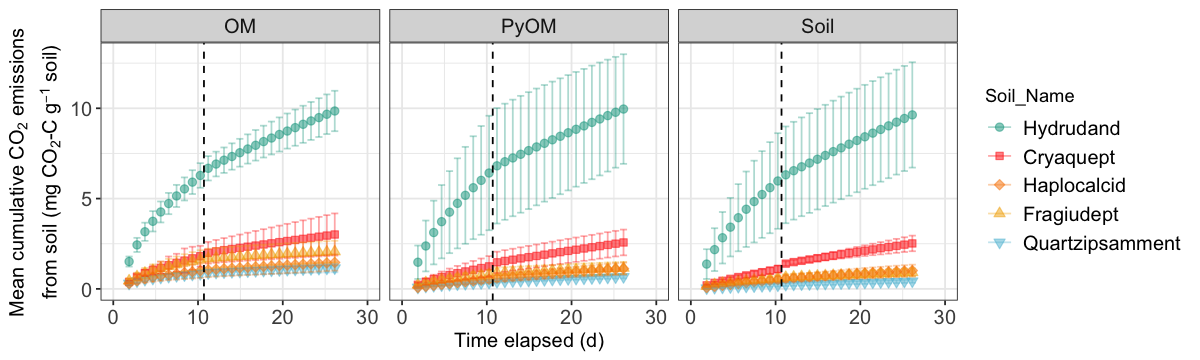

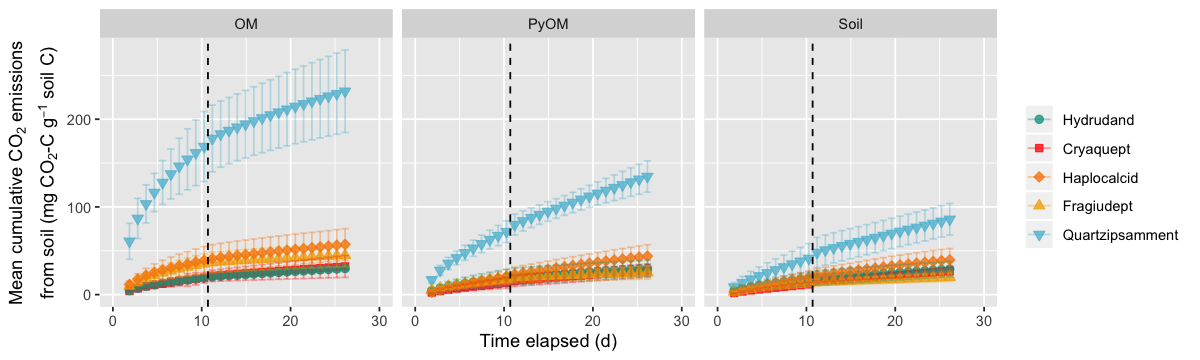

In [24]:
options(repr.plot.width=10, repr.plot.height=3)

p = ggplot(df.means,aes(x=Day, y=Soil_mean_cum_CO2_mg_g_Soil, color = Soil_Name,shape=Soil_Name,fill=Soil_Name))
p = p + geom_point(size=2, alpha=0.5)
p = p + geom_errorbar(aes(ymin = Soil_mean_cum_CO2_mg_g_Soil - 1.96*Soil_se, ymax = Soil_mean_cum_CO2_mg_g_Soil + 1.96*Soil_se),alpha=0.35)
p = p + geom_vline(xintercept=10.7, linetype="dashed")
p = p + facet_wrap(~Amdmt)
p = p + expand_limits(y=0)
p = p + ylab(expression(atop(paste("Mean cumulative ", CO[2]," emissions",sep=""), paste("from soil (mg ", CO[2], "-C ", g^-1," soil)", sep="")))) + xlab("Time elapsed (d)")
wespalette = c(wes_palette("Darjeeling1"),wes_palette("Darjeeling2")[2:4])
wespalette = wespalette[c(2,1,4,3,5,6)]
p = p + scale_colour_manual(values=wespalette)+ scale_fill_manual(values=wespalette) + scale_shape_manual(values=c(21:25))
p = p + xlim(0,30)
p = p + theme(legend.title = element_blank())
p = p + theme_bw()
p = p + theme(strip.text = element_text(size=12),axis.text = element_text(size=12))
p = p + theme(axis.title = element_text(size=12),legend.text=element_text(size=12))
p

p = ggplot(df.means,aes(x=Day, y=Soil_mean_cum_CO2_mg_g_Soil_C, color = Soil_Name,shape=Soil_Name,fill=Soil_Name))
p = p + geom_point(size=2, alpha=0.75)
p = p + geom_errorbar(aes(ymin = Soil_mean_cum_CO2_mg_g_Soil_C - 1.96*Soil_se.C, ymax = Soil_mean_cum_CO2_mg_g_Soil_C + 1.96*Soil_se.C),alpha=0.35)
p = p + geom_vline(xintercept=10.7, linetype="dashed")
p = p + facet_wrap(~Amdmt)
p = p + expand_limits(y=0)
p = p + ylab(expression(atop(paste("Mean cumulative ", CO[2]," emissions",sep=""), paste("from soil (mg ", CO[2], "-C ", g^-1," soil C)", sep="")))) + xlab("Time elapsed (d)")
wespalette = c(wes_palette("Darjeeling1"),wes_palette("Darjeeling2")[2:4])
wespalette = wespalette[c(2,1,4,3,5,6)]
p = p + scale_colour_manual(values=wespalette)+ scale_fill_manual(values=wespalette) + scale_shape_manual(values=c(21:25))
p = p + xlim(0,30)
#p = p + ylim(0,30)
p = p + theme(legend.title = element_blank())
p

Warning message:
“Removed 10 rows containing missing values (geom_point).”Warning message:
“Removed 10 rows containing missing values (geom_errorbar).”

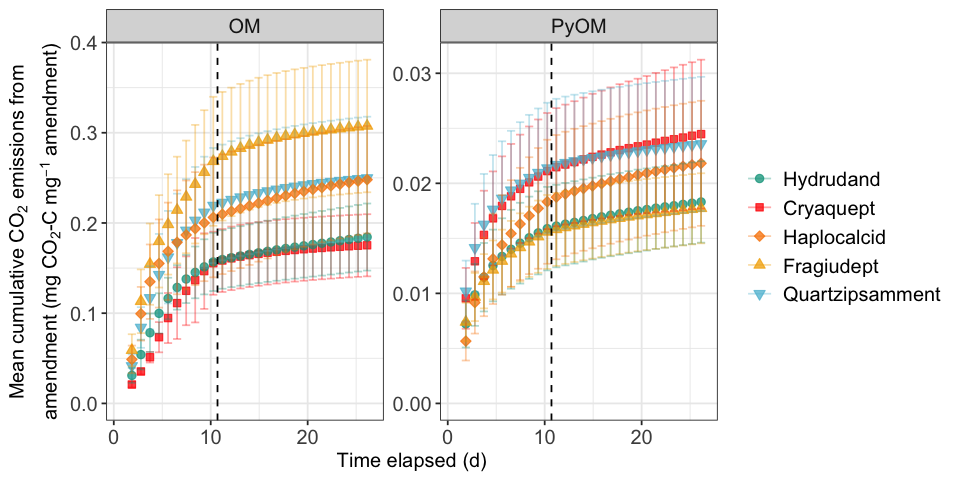

In [25]:
options(repr.plot.width=8, repr.plot.height=4)

df = df.means%>%
    filter(Amdmt != "Soil")#%>%
    #filter(Soil_Trtmt %in% c("Alaska","New York","Hawaii"))

p = ggplot(df,aes(x=Day, y=Amdmt_mean_cum_CO2_mg_mg_Amdmt, color = Soil_Name, shape=Soil_Name,fill=Soil_Name))
p = p + geom_point(alpha=0.75, size=2)
p = p + theme_bw()
p = p + theme(strip.text = element_text(size=12),axis.text = element_text(size=12))
p = p + theme(axis.title = element_text(size=12),legend.text=element_text(size=12))
p = p + geom_errorbar(aes(ymin = Amdmt_mean_cum_CO2_mg_mg_Amdmt - 1.96*Amdmt_se, ymax = Amdmt_mean_cum_CO2_mg_mg_Amdmt + 1.96*Amdmt_se),alpha=0.35)
p = p + geom_vline(xintercept=10.7, linetype="dashed")
p = p + facet_wrap(~Amdmt, scales="free_y")
p = p + expand_limits(y=0)
#p = p + ylab(expression("Mean cumulative CO2\nemissions from amendment\n(mg CO"[2]" mg-1 amendment)")) + xlab("Time elapsed (d)")
p = p + ylab(expression(atop(paste("Mean cumulative ", CO[2]," emissions from",sep=""), paste("amendment (mg ", CO[2], "-C ", mg^-1," amendment)", sep=""))))
p = p + xlab("Time elapsed (d)")
wespalette = rev(wes_palette("Darjeeling1"))[c(4,5,2,3,1)]
p = p + scale_colour_manual(values=wespalette)+ scale_fill_manual(values=wespalette) + scale_shape_manual(values=c(21:25))
p = p + theme(legend.title = element_blank(), axis.title.y = element_text(size=12))
p

Warning message:
“Removed 10 rows containing missing values (geom_point).”Warning message:
“Removed 10 rows containing missing values (geom_errorbar).”

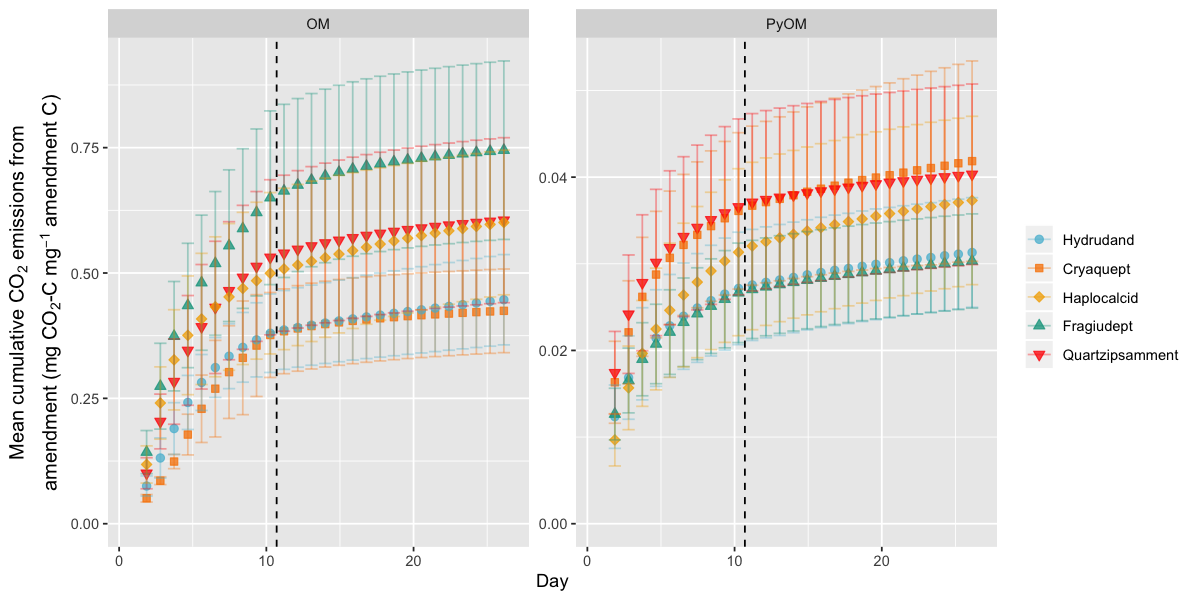

In [26]:
options(repr.plot.width=10, repr.plot.height=5)


p = ggplot(df,aes(x=Day, y=Amdmt_mean_cum_CO2_mg_mg_Amdmt_C, color = Soil_Name,shape=Soil_Name,fill=Soil_Name))
p = p + geom_point(alpha=0.75, size=2)
p = p + geom_errorbar(aes(ymin = Amdmt_mean_cum_CO2_mg_mg_Amdmt_C - 1.96*Amdmt_se.C, ymax = Amdmt_mean_cum_CO2_mg_mg_Amdmt_C + 1.96*Amdmt_se.C),alpha=0.35)
p = p + geom_vline(xintercept=10.7, linetype="dashed")
p = p + facet_wrap(~Amdmt, scales="free_y")
p = p + expand_limits(y=0)
#p = p + ylab(expression("Mean cumulative CO2\nemissions from amendment\n(mg CO"[2]" mg-1 amendment)")) + xlab("Time elapsed (d)")
p = p + ylab(expression(atop(paste("Mean cumulative ", CO[2]," emissions from",sep=""), paste("amendment (mg ", CO[2], "-C ", mg^-1," amendment C)", sep=""))))
wespalette = rev(wes_palette("Darjeeling1"))
p = p + scale_colour_manual(values=wespalette)+ scale_fill_manual(values=wespalette) + scale_shape_manual(values=c(21:25))
p = p + theme(legend.title = element_blank(), axis.title.y = element_text(size=12))
p

Warning message:
“Removed 10 rows containing missing values (geom_point).”Warning message:
“Removed 10 rows containing missing values (geom_errorbar).”

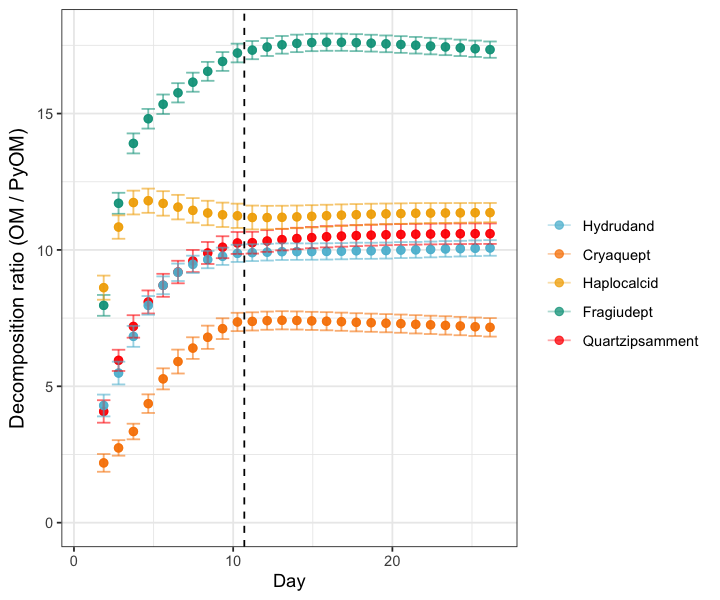

In [29]:
options(repr.plot.width=6, repr.plot.height=5)

df = df.means%>%
    filter(Amdmt != "Soil")%>%
    group_by(Soil_Name,Day)%>%
    mutate(Ratio = Amdmt_mean_cum_CO2_mg_mg_Amdmt[Amdmt=="OM"]/Amdmt_mean_cum_CO2_mg_mg_Amdmt[Amdmt=="PyOM"])%>%
    mutate(Ratio_se = ((Amdmt_se[Amdmt=="OM"]/Amdmt_mean_cum_CO2_mg_mg_Amdmt[Amdmt=="OM"])^2 + (Amdmt_se[Amdmt=="PyOM"]/Amdmt_mean_cum_CO2_mg_mg_Amdmt[Amdmt=="PyOM"])^2)^0.5)

p = ggplot(df,aes(x=Day, y=Ratio, color = Soil_Name))
p = p + theme_bw()
p = p + geom_point(alpha=0.75, size=2)
p = p + geom_errorbar(aes(ymin = Ratio - 1.96*Ratio_se, ymax = Ratio + 1.96*Ratio_se),alpha=0.35)
p = p + geom_vline(xintercept=10.7, linetype="dashed")
p = p + expand_limits(y=0)
#p = p + ylab(expression("Mean cumulative CO2\nemissions from amendment\n(mg CO"[2]" mg-1 amendment)")) + xlab("Time elapsed (d)")
p = p + ylab(expression(paste("Decomposition ratio (OM / PyOM)",sep="")))
wespalette = rev(wes_palette("Darjeeling1"))
p = p + scale_colour_manual(values=wespalette)

p = p + theme(legend.title = element_blank(), axis.title.y = element_text(size=12))
p
# Starts out low as easily-min PyOM is consumed, then levels off hight as only unapealling stuff is left?

In [30]:
options(repr.plot.width=8, repr.plot.height=4.5)

df = df.means%>%
    filter(Amdmt != "Soil")

p = ggplot(df,aes(x=Soil_mean_cum_CO2_mg_g_Soil, y=Amdmt_mean_cum_CO2_mg_mg_Amdmt, color = Soil_Name))
p = p + geom_point(alpha=0.75, size=2)
#p = p + geom_errorbar(aes(ymin = Amdmt_mean_cum_CO2_mg_mg_Amdmt - Amdmt_se, ymax = Amdmt_mean_cum_CO2_mg_mg_Amdmt + Amdmt_se),alpha=0.35)
p = p + facet_wrap(~Amdmt, scales="free_y")
p = p + expand_limits(y=0)
#p = p + ylab(expression("Mean cumulative CO2\nemissions from amendment\n(mg CO"[2]" mg-1 amendment)")) + xlab("Time elapsed (d)")
p = p + ylab(expression(atop(paste("Mean cumulative ", CO[2]," emissions",sep=""), paste("from amendment (mg ", CO[2], "-C ", mg^-1,")", sep="")))) + xlab(expression(atop(paste("Mean cumulative ", CO[2]," emissions",sep=""), paste("from soil (mg ", CO[2], " ", g^-1,")", sep=""))))
wespalette = rev(wes_palette("Darjeeling1"))
p = p + scale_colour_manual(values=wespalette)
p = p + theme(legend.title = element_blank(), axis.title.y = element_text(size=12))
#p

Warning message:
“Unknown or uninitialised column: 'PrimingRef'.”Warning message:
“Unknown or uninitialised column: 'PrimingRef_se'.”Warning message:
“Unknown or uninitialised column: 'PrimingRef.C'.”Warning message:
“Unknown or uninitialised column: 'PrimingRef_se.C'.”Warning message:
“Removed 10 rows containing missing values (geom_point).”Warning message:
“Removed 142 rows containing missing values (geom_errorbar).”Warning message:
“Removed 10 rows containing missing values (geom_point).”Warning message:
“Removed 10 rows containing missing values (geom_errorbar).”

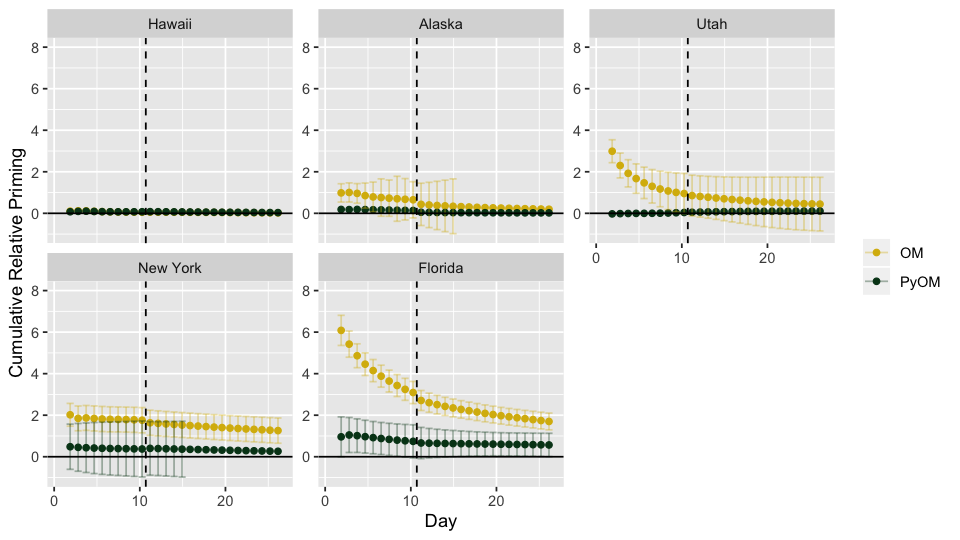

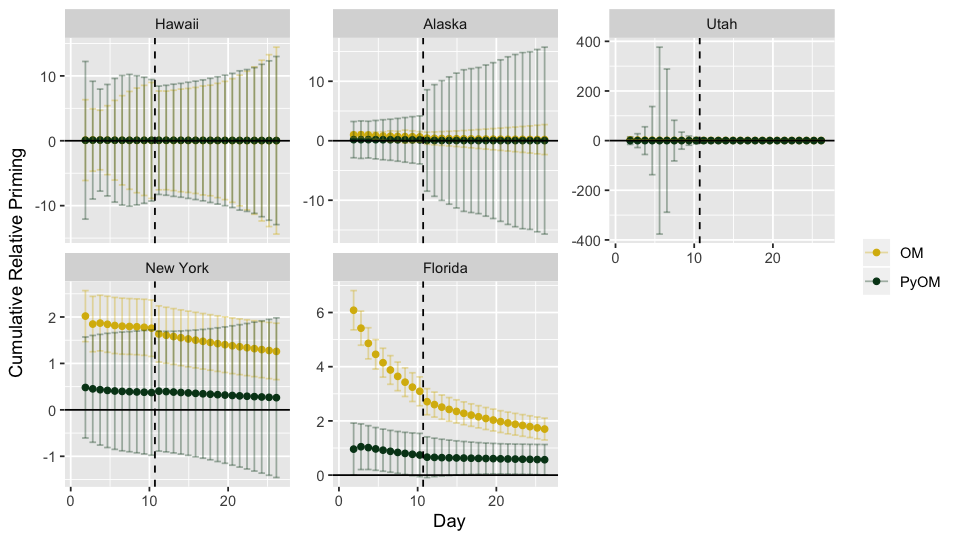

In [31]:
### Calculating priming

df = df.means

for (i in 1:dim(df)[1]){
    Soil_Trtmt = df$Soil_Trtmt[i]
    sample.rep = df$sample.rep[i]
    df$PrimingRef[i] = df$Soil_mean_cum_CO2_mg_g_Soil[df$Soil_Trtmt==Soil_Trtmt & df$sample.rep==sample.rep & df$Amdmt=="Soil"]
    df$PrimingRef_se[i] = df$Soil_se[df$Soil_Trtmt==Soil_Trtmt & df$sample.rep==sample.rep & df$Amdmt=="Soil"]
    df$PrimingRef.C[i] = df$Soil_mean_cum_CO2_mg_g_Soil_C[df$Soil_Trtmt==Soil_Trtmt & df$sample.rep==sample.rep & df$Amdmt=="Soil"]
    df$PrimingRef_se.C[i] = df$Soil_se.C[df$Soil_Trtmt==Soil_Trtmt & df$sample.rep==sample.rep & df$Amdmt=="Soil"]

}

df = df%>%
    group_by(Soil_Trtmt,sample.rep)%>%
    mutate(PrimingAbs = Soil_mean_cum_CO2_mg_g_Soil - PrimingRef)%>%
    mutate(PrimingAbs_se = ((Soil_se)^2 + (PrimingRef_se)^2)^0.5)%>%
    mutate(PrimingFract = PrimingAbs / PrimingRef)%>%
    mutate(PrimingFract_se = ((PrimingAbs_se/PrimingAbs)^2+(PrimingRef_se/PrimingRef)^2)^0.5)%>%

    mutate(PrimingAbs.C = Soil_mean_cum_CO2_mg_g_Soil_C - PrimingRef.C)%>%
    mutate(PrimingAbs_se.C = ((Soil_se.C)^2 + (PrimingRef_se.C)^2)^0.5)%>%
    mutate(PrimingFract.C = PrimingAbs.C / PrimingRef.C)%>%
    mutate(PrimingFract_se.C = ((PrimingAbs_se.C/PrimingAbs.C)^2+(PrimingRef_se.C/PrimingRef.C)^2)^0.5)

# Note - errors in Utah get very large because PrimingAbs gets very close to 0.

df = df %>%
    filter(Amdmt != "Soil")

p = ggplot(df,aes(x=Day,y=PrimingFract,colour=Amdmt))
p = p + geom_point()
p = p + geom_errorbar(aes(ymin = PrimingFract - 1.96*PrimingFract_se, ymax = PrimingFract + 1.96*PrimingFract_se),alpha=0.35)
p = p + geom_vline(xintercept=10.7, linetype="dashed")
p = p + geom_hline(yintercept=0, linetype="solid")
wespalette = c(wes_palette("Cavalcanti1"))
wespalette = wespalette[c(1,2,3)]
p = p + scale_colour_manual(values=wespalette)
p = p + facet_wrap(~Soil_Trtmt, scales = "free_y")
p = p + ylim(-1,8)
p = p + ylab("Cumulative Relative Priming")
p = p + theme(legend.title = element_blank())
p

p2 = ggplot(df,aes(x=Day,y=PrimingFract.C,colour=Amdmt))
p2 = p2 + geom_point()
p2 = p2 + geom_errorbar(aes(ymin = PrimingFract.C - 1.96*PrimingFract_se.C, ymax = PrimingFract.C + 1.96*PrimingFract_se.C),alpha=0.35)
p2 = p2 + geom_vline(xintercept=10.7, linetype="dashed")
p2 = p2 + geom_hline(yintercept=0, linetype="solid")
wespalette = c(wes_palette("Cavalcanti1"))
wespalette = wespalette[c(1,2,3)]
p2 = p2 + scale_colour_manual(values=wespalette)
p2 = p2 + facet_wrap(~Soil_Trtmt, scales = "free_y")
#p2 = p2 + ylim(-1,8)
p2 = p2 + ylab("Cumulative Relative Priming")
p2 = p2 + theme(legend.title = element_blank())
p2 

# It comes out the same because it's relativized.

Warning message:
“Removed 10 rows containing missing values (geom_point).”Warning message:
“Removed 10 rows containing missing values (geom_point).”

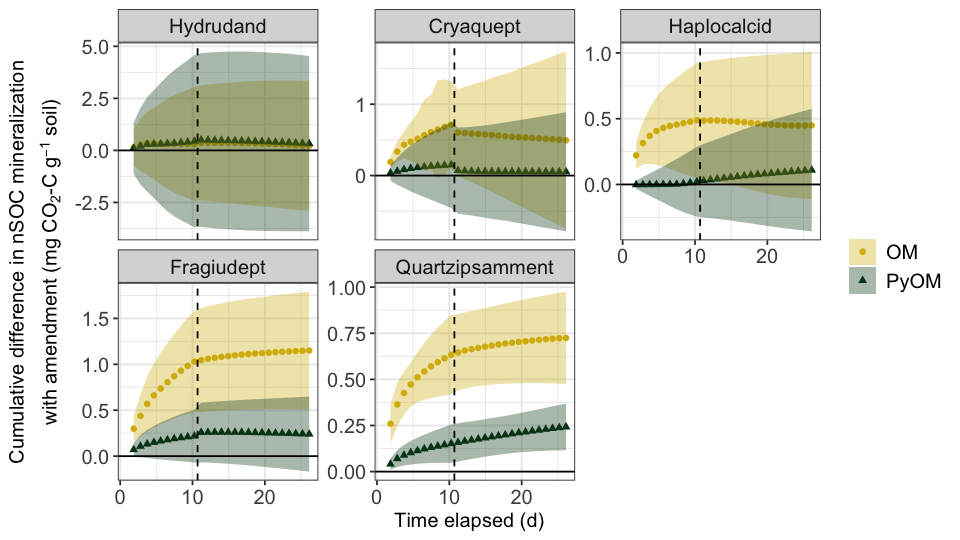

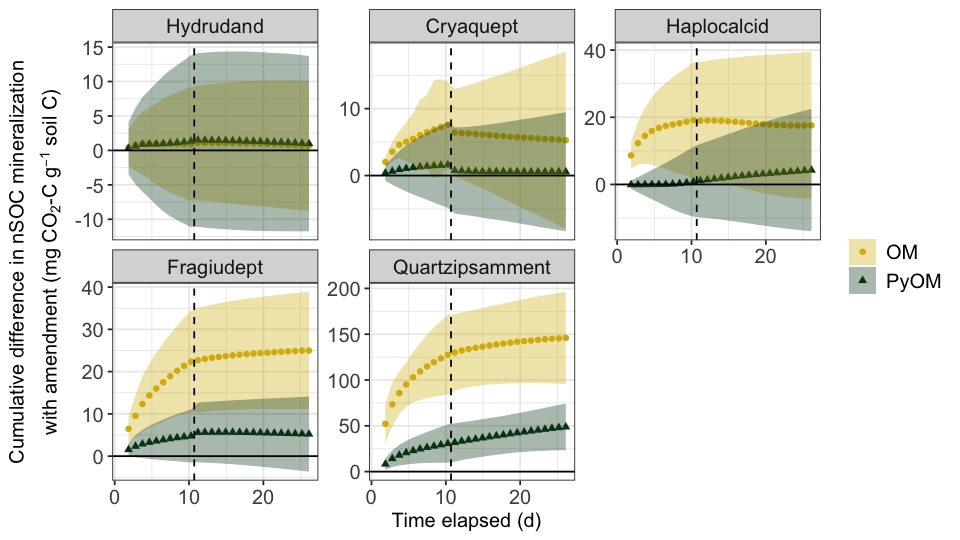

In [36]:
options(repr.plot.width=8, repr.plot.height=4.5)

p = ggplot(df,aes(x=Day,y=PrimingAbs,shape=Amdmt))
p = p + geom_point(aes(colour=Amdmt))
p = p + geom_ribbon(aes(fill=Amdmt,ymin = PrimingAbs - 1.96*PrimingAbs_se, ymax = PrimingAbs + 1.96*PrimingAbs_se),alpha=0.35)
p = p + geom_vline(xintercept=10.7, linetype="dashed")
p = p + geom_hline(yintercept=0, linetype="solid")
wespalette = c(wes_palette("Cavalcanti1"))
wespalette = wespalette[c(1,2,3)]
p = p + scale_colour_manual(values=wespalette)
p = p + scale_fill_manual(values=wespalette)
p = p + facet_wrap(~Soil_Name, scales = "free_y")
#p = p + ylim(-1,2)
p = p + ylab(expression(atop(paste("Cumulative difference in nSOC mineralization"), paste("with amendment (mg ", CO[2],"-C ", g^-1," soil)", sep=""))))+ xlab("Time elapsed (d)")
#p = p + ylab(expression(atop(paste("Mean cumulative ", CO[2]," emissions",sep=""), paste("from nSOC (mg ", CO[2], "-C ", g^-1," soil)", sep="")))) + xlab("Time elapsed (d)")
p = p + theme_bw()
p = p + theme(legend.title = element_blank())
p = p + theme(strip.text = element_text(size=12),axis.text = element_text(size=12))
p = p + theme(axis.title = element_text(size=12),legend.text=element_text(size=12))
p

p = ggplot(df,aes(x=Day,y=PrimingAbs.C,shape=Amdmt))
p = p + theme_bw()
p = p + geom_point(aes(colour=Amdmt))
p = p + geom_ribbon(aes(fill=Amdmt,ymin = PrimingAbs.C - 1.96*PrimingAbs_se.C, ymax = PrimingAbs.C + 1.96*PrimingAbs_se.C),alpha=0.35)
p = p + geom_vline(xintercept=10.7, linetype="dashed")
p = p + geom_hline(yintercept=0, linetype="solid")
wespalette = c(wes_palette("Cavalcanti1"))
wespalette = wespalette[c(1,2,3)]
p = p + scale_colour_manual(values=wespalette)
p = p + scale_fill_manual(values=wespalette)
p = p + facet_wrap(~Soil_Name, scales = "free_y")
p = p + ylab(expression(atop(paste("Cumulative difference in nSOC mineralization"), paste("with amendment (mg ", CO[2],"-C ", g^-1," soil C)", sep=""))))+ xlab("Time elapsed (d)")
p = p + theme(legend.title = element_blank())
p = p + theme(strip.text = element_text(size=12),axis.text = element_text(size=12))
p = p + theme(axis.title = element_text(size=12),legend.text=element_text(size=12))
#p = p + ylim(-20,60)
p

# Just shifts the scales.

In [ ]:
## I think this is the basics.
# The next step is going to be how we analyze / include the soil microbial community data.

Objectives from the original DDIG proposal:

Question 1: Are soils with more recalcitrant SOC more prone to stimulation by BC additions?

    Hypothesis 1A: Soils with more recalcitrant SOC are more likely to experience increased mineralization with BC additions.
    Rationale 1A: These microbial communities are more likely to be C-limited, and the labile fraction of BC could alleviate this constraint.
    Hypothesis 1B: Soils with more recalcitrant SOC are less likely to experience increased mineralization with BC additions.
    Rationale 1B: The microbial communities are limited by something other than C, such as mineral nutrients. If BC additions alleviate this constraint, microbial communities in soils with more labile C are better able to take advantage of this subsidy.

Finding 1: 1A, but only sort of. - Yes, soils with more SOC and more mineralization are more prone to stimulation. However, on a per-g soil C, the soils are all respiring at similar rates - i.e., for a given mass of C, the same amount is respired - except for Florida, which is being respired rapidly (because there is very little C there). Kind of interesting. OM results confirm C-limitation hypothesis, although BC still not ideal substrate, perhaps.

Question 2: Do soil microbial communities reflect changes in SOC mineralization with BC additions?

    Hypothesis 2A: There are greater microbial community shifts in the soils where BC additions increase SOC mineralization.
    Rationale 2A: Groups of microbes that respond positively to BC additions may be the same groups that are responsible for increased SOC mineralization with BC additions, so a stronger shift toward these groups may accompany a stronger effect on SOC mineralization.
    Hypothesis 2B: BC additions result in similar shifts in microbial communities across soils. Rationale 2B: BC additions to soils may have such a strong effect on the microbial community composition that differences from one soil to the next are too subtle in comparison to detect.
    Hypothesis 2C: There are no substantial community shifts with BC additions.
    Rationale 2C: At environmentally relevant rates, while BC additions may provide an additional C source, it may be relatively small in comparison to available SOC, and any effects of BC additions on soil water-holding capacity, pH, or nutrient availability may not be large enough to clearly affect the soil microbial community.

Finding 2: Need to test for how much additions change the communities - pretty easy - compare unifrac or Bray distances